In [84]:
import torchaudio
from dtw import dtw
from numpy.linalg import norm
from speechbrain.lobes.features import MFCC

file1='./data/hey_xpeng/hey_xpeng_01.wav'
# file2='./data/hey_xpeng/hey_xpeng_10.wav'
# file2='./data/hey_xpeng/hey_xpeng_07.wav'
file2='./data/hey_xpeng/hey_xpeng_03.wav'

signal1, sr1 = torchaudio.load(file1)
signal2, sr2 = torchaudio.load(file2)
print(signal1.shape)
print(signal2.shape)

mfcc_maker = MFCC(n_mfcc=13, deltas=False, context=False)
mfccs1 = mfcc_maker(signal1)
mfccs2 = mfcc_maker(signal2)

mfccs1 = mfccs1.squeeze(0)
mfccs2 = mfccs2.squeeze(0)
print(mfccs1.shape)
print(mfccs2.shape)

mfcc1 = mfccs1.numpy()
mfcc2 = mfccs2.numpy()

dtw_result = dtw(mfcc1, mfcc2, dist=lambda x, y: norm(x - y, ord=2))
distance_sum = dtw_result[0]
print(f"The normalized distance between the two : {distance_sum}")

torch.Size([1, 18035])
torch.Size([1, 21456])
torch.Size([113, 13])
torch.Size([135, 13])
The normalized distance between the two : 3457.127067565918


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


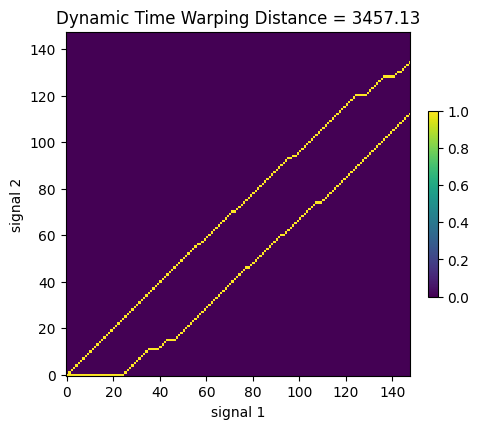

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import torch


x = dtw_result[-1][0]
y = dtw_result[-1][1]

targets=torch.zeros(x.shape[0], y.shape[0])
index1 = torch.from_numpy(x.astype(np.int64)).unsqueeze(0).T
index2 = torch.from_numpy(y.astype(np.int64)).unsqueeze(0).T
targets.scatter_(1,index1,1)
targets.scatter_(1,index2,1)
print(targets)

ax=plt.matshow(targets.numpy().T)
ag=plt.gca()
ag.xaxis.set_ticks_position('bottom')
ag.invert_yaxis()
plt.colorbar(ax.colorbar, fraction=0.025)
plt.title(f'Dynamic Time Warping Distance = {round(distance_sum,2)}')
plt.xlabel("signal 1")
plt.ylabel("signal 2")
plt.show()

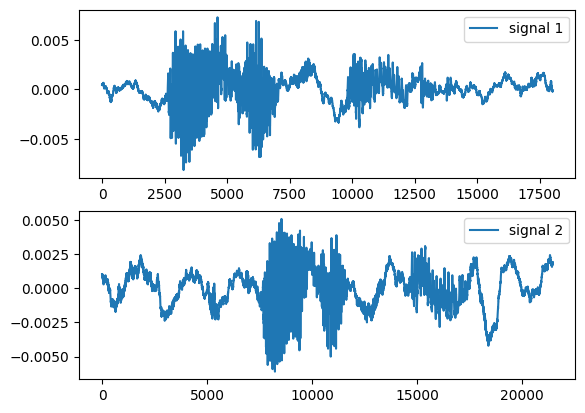

In [86]:
plt.subplot(2,1,1)
plt.plot(signal1.T, label='signal 1')
plt.legend()

plt.subplot(2,1,2)
plt.plot(signal2.T, label='signal 2')
plt.legend()
plt.show()